# machine-learning-course-project-final

## Downloading Dataset

In [1]:
import os
import opendatasets as od
import pandas as pd                      # Importing the pandas library for data manipulation and analysis
import seaborn as sns                    # Importing the seaborn library for data visualization
import matplotlib.pyplot as plt          # Importing the matplotlib library for data visualization
import numpy as np                       # Importing the numpy library for numerical operations
import plotly.express as px               # Importing plotly.express for interactive data visualization
import matplotlib                         # Importing matplotlib for configuring plotting settings                  
%matplotlib inline  

In [2]:
import warnings
from pandas.errors import PerformanceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=PerformanceWarning)

In [3]:
od.download('https://www.kaggle.com/datasets/goyaladi/iit-admissions-dataset')

Skipping, found downloaded files in ".\iit-admissions-dataset" (use force=True to force download)


In [4]:
df = pd.read_csv('iit-admissions-dataset/student_data.csv')

In [5]:
df.shape

(200000, 10)

there are 200,000 rows of data and 10 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Student ID                   200000 non-null  int64 
 1   Student Name                 200000 non-null  object
 2   Date of Birth                200000 non-null  object
 3   Field of Study               200000 non-null  object
 4   Year of Admission            200000 non-null  int64 
 5   Expected Year of Graduation  200000 non-null  int64 
 6   Current Semester             200000 non-null  int64 
 7   Specialization               200000 non-null  object
 8   Fees                         200000 non-null  int64 
 9   Discount on Fees             200000 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.3+ MB


In [7]:
df.isna().sum()

Student ID                     0
Student Name                   0
Date of Birth                  0
Field of Study                 0
Year of Admission              0
Expected Year of Graduation    0
Current Semester               0
Specialization                 0
Fees                           0
Discount on Fees               0
dtype: int64

Therefore, there are no missing values.

In [8]:
df.describe()

,Student ID,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,549367.492925,2018.997685,2019.995235,2.499020,125092.847595,12484.258575
std,259361.565011,2.002381,1.997744,1.117804,43287.894903,8788.362629
min,100001.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,325311.000000,2017.000000,2018.000000,1.000000,87641.500000,5383.000000
50%,548855.500000,2019.000000,2020.000000,2.000000,125221.000000,10792.500000
75%,774182.500000,2021.000000,2022.000000,3.000000,162597.250000,18154.000000
max,999997.000000,2022.000000,2023.000000,4.000000,200000.000000,39865.000000


In [9]:
df_copy = df.copy()

df_copy is copy of df dataframe, so original dataset stays original. 
here in df_copy we will do all of the Machine Learning steps

## EDA

In [10]:
df_copy.head(5)

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020,2017,3,Web Development,155152,19572
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020,2020,2,Machine Learning,157870,14760
2,740021,David Robinson,1997-12-02,Civil Engineering,2017,2022,1,Network Security,55662,5871
3,433076,Susan Miller,1999-10-30,Computer Science,2021,2019,1,Data Science,134955,17284
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016,2018,1,Network Security,125934,14871


In [11]:
print('----------Specialization----------')
df_copy['Specialization'].value_counts()

----------Specialization----------


Web Development            40292
Machine Learning           40142
Network Security           39932
Data Science               39870
Artificial Intelligence    39764
Name: Specialization, dtype: int64

 web development being the most taken, AI is least taken speacialty

In [12]:
print('----------Field Of Study----------')
df_copy['Field of Study'].value_counts()

----------Field Of Study----------


Electrical Engineering    40305
Chemical Engineering      40020
Computer Science          39960
Mechanical Engineering    39941
Civil Engineering         39774
Name: Field of Study, dtype: int64

here most of students took Electrical Engineering as Field of Study

In [13]:
print('----------Current Semester--------')
df_copy['Current Semester'].value_counts()

----------Current Semester--------


3    50079
1    50057
2    49973
4    49891
Name: Current Semester, dtype: int64

sem 3 has the highest students while sem 4 least. looks like final year students are lesser  

In [14]:
df_copy['Year of Admission'].value_counts()

2017    28760
2022    28703
2016    28646
2019    28618
2021    28483
2018    28435
2020    28355
Name: Year of Admission, dtype: int64

In [15]:
df_copy['Expected Year of Graduation'].value_counts()

2021    28705
2019    28658
2020    28616
2018    28613
2017    28590
2022    28458
2023    28360
Name: Expected Year of Graduation, dtype: int64

according to the data , 2023 is the highest year for graduation. but this data is wrong and needs to be corrected.
i can say this, because this dataset is updated dataset till of 2022. and people taking admission in 2022 will have graduation on 2026 as highest.
and this dataset is of IIT of undergraduates.

<Figure size 3000x2400 with 0 Axes>

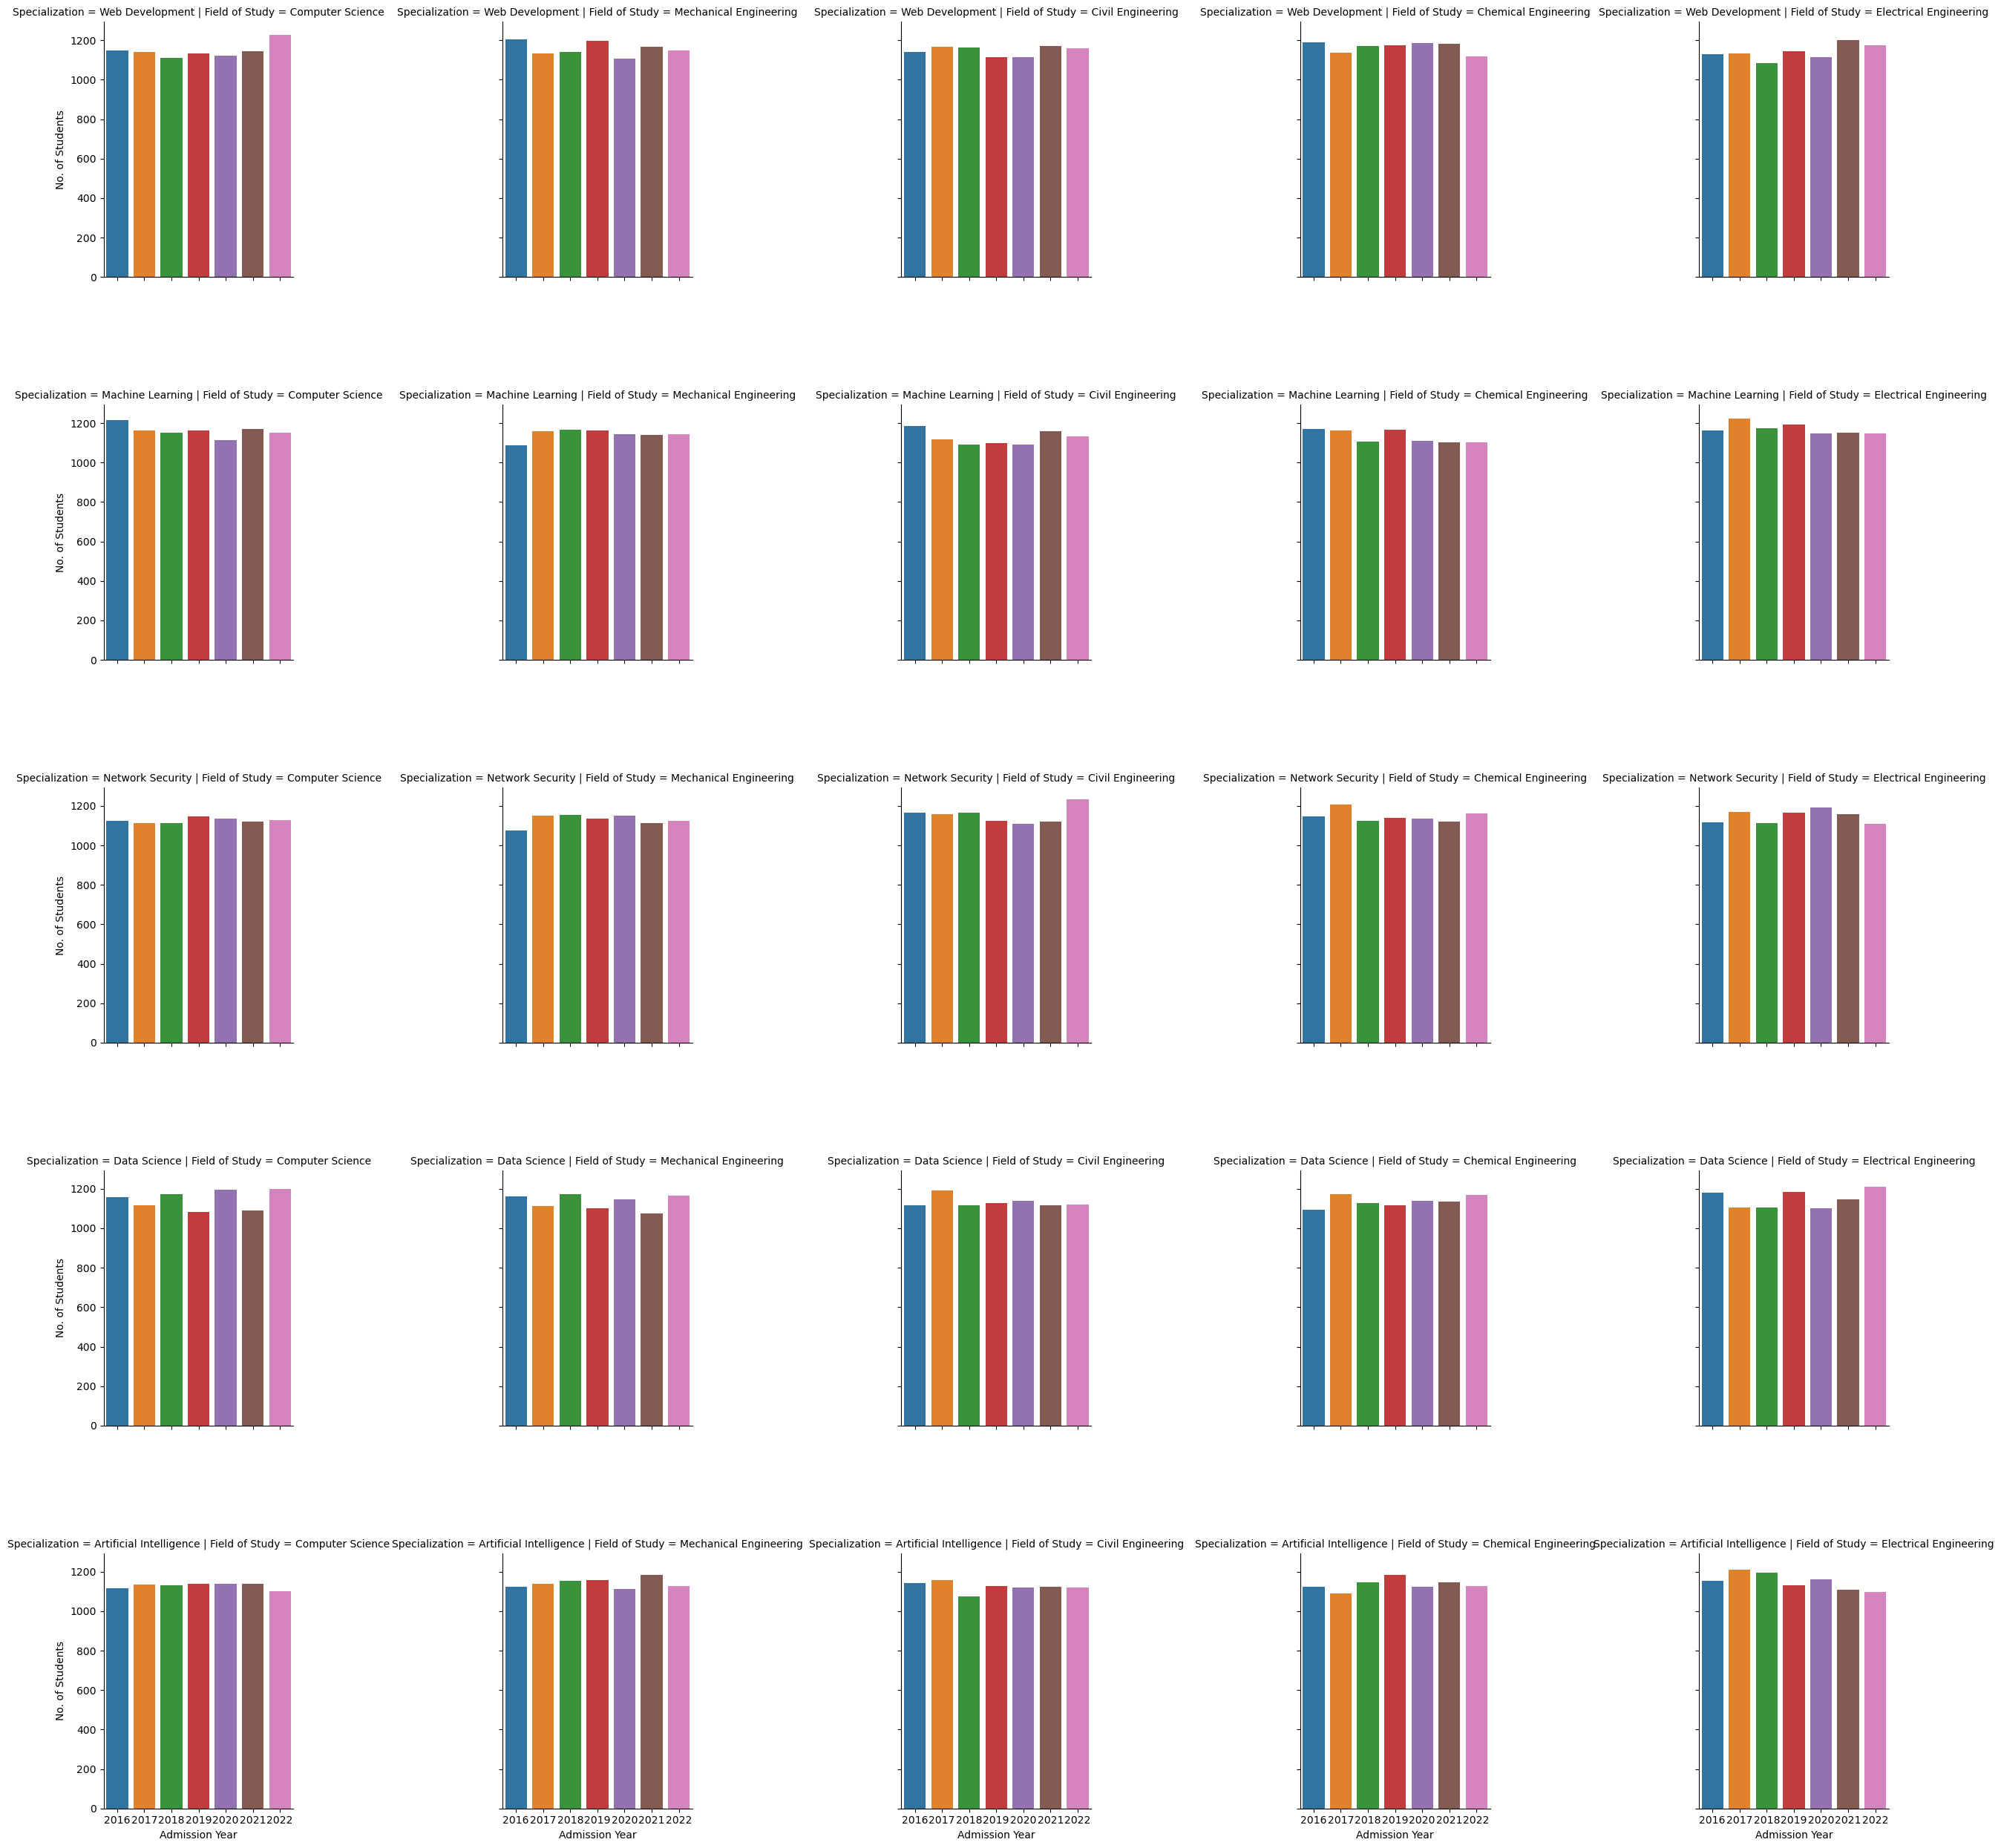

In [16]:
# lets see graph where Student Admission each year in Field of Study and Speacialization 
plt.figure(figsize=(30, 24))
g = sns.catplot(data=df_copy, x="Year of Admission", col="Field of Study", row="Specialization", kind="count")

# set x-label and y-label of every sub-plot to custom value
for ax in g.axes.flat:
    ax.set_xlabel('Admission Year')   # setting x-axis label
    ax.set_ylabel('No. of Students')   # setting y-axis label
g.fig.subplots_adjust(hspace=0.5, wspace=1.1)

plt.show()

according to the graph , the admission of Student Each year in the each speacialization and Field of Study are in logarithm. as it increase decrease then increase again.

<Axes: >

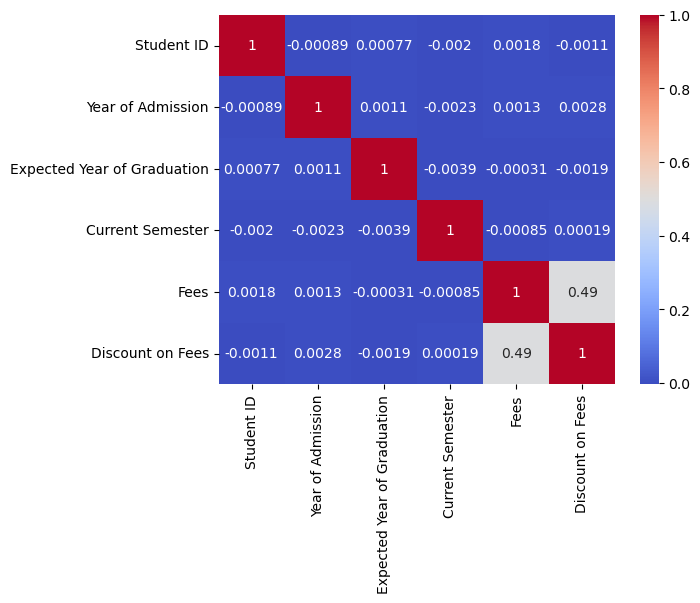

In [17]:
# Calculate correlation matrix
corr_matrix = df_copy.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

seeing this , its a very bad correlation between each columns. our target Discount on fees closely correlated is single Fees Column

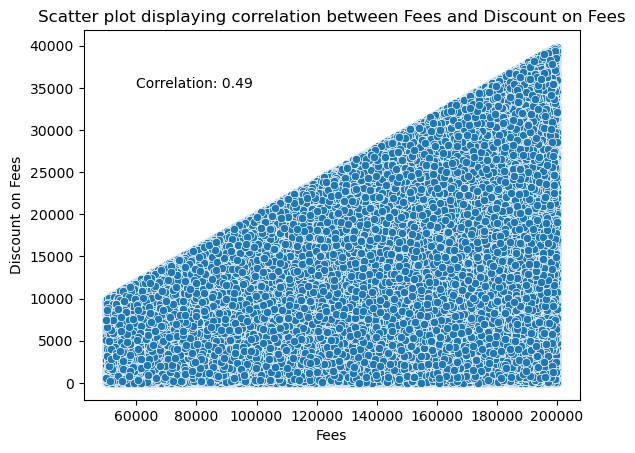

In [18]:
corr = df_copy[["Fees", "Discount on Fees"]].corr()["Discount on Fees"][0]      # finding correlation between fees and discount on fee
sns.scatterplot(data=df_copy, x="Fees", y="Discount on Fees")               # creating a scatterplot
plt.xlabel("Fees")
plt.ylabel("Discount on Fees")
plt.title("Scatter plot displaying correlation between Fees and Discount on Fees")
plt.text(60000, 35000, f"Correlation: {corr:.2}")                   # displaying text on the plot
plt.show()

the discount on fees gradually increase as the Fees increase

## preprocessing

### Fixing Numerical Columns
the columns Year of Admission, Expected Year of Graduation were wrong. 
To fix below are the steps

In [19]:

count = 0
for index, row in df_copy.iterrows():
    if row['Year of Admission'] > row['Expected Year of Graduation']:
        count += 1

print("Count of rows with Year of Admission > Year of Graduation:", count)

Count of rows with Year of Admission > Year of Graduation: 61149


In [20]:
## Correction of data where Year of Graducation is increased acording to year of admission.

for index, row in df_copy.iterrows():
    # Check if Year of Admission is greater than Expected Year of Graduation
    if row['Year of Admission'] > row['Expected Year of Graduation']:
        # Increase the Expected Year of Graduation by 4 years
        df_copy.at[index, 'Expected Year of Graduation'] = row['Year of Admission'] + 4

# Verify the correction
count_corrected = (df_copy['Year of Admission'] > df_copy['Expected Year of Graduation']).sum()
print("Count of rows with corrected data:", count_corrected)


Count of rows with corrected data: 0


here, the Expected Year of Graducation is Inreased from Year of Admission. as Year of Admission data was correct. 
this was done only to the data where Year of Admission was less than Expected Year of Graduation

In [21]:
# Calculate the difference between Year of Graduation and Year of Admission
df_copy['Year Difference'] = df_copy['Expected Year of Graduation'] - df_copy['Year of Admission']

# Count the number of rows where the Year Difference is less than 4
count_less_than_4 = (df_copy['Year Difference'] < 4).sum()
count_more_than_4 = (df_copy['Year Difference'] > 4).sum()

# Print the count
print("Number of rows with Year Difference < 4:", count_less_than_4)
print("Number of rows with Year Difference > 4:", count_more_than_4)

Number of rows with Year Difference < 4: 98076
Number of rows with Year Difference > 4: 24405


since its a 4 year degree, the year difference must be equal to 4. 
to correct this we either increase of decrease the Expected Year of Graduation

In [22]:

# Iterate over each row in the DataFrame
for index, row in df_copy.iterrows():
    admission_year = row['Year of Admission']
    expected_graduation_year = row['Expected Year of Graduation']
    
    if expected_graduation_year - admission_year < 4:
        expected_graduation_year = admission_year + 4
    elif expected_graduation_year - admission_year > 4:
        expected_graduation_year = admission_year + 4
    # If the difference is already 4, no action is needed
    
    df_copy.at[index, 'Expected Year of Graduation'] = expected_graduation_year



In [23]:
# Calculate the difference between Year of Graduation and Year of Admission
df_copy['Year Difference'] = df_copy['Expected Year of Graduation'] - df_copy['Year of Admission']

# Count the number of rows where the Year Difference is less than 4
count_less_than_4 = (df_copy['Year Difference'] < 4).sum()
count_more_than_4 = (df_copy['Year Difference'] > 4).sum()

# Print the count
print("Number of rows with Year Difference < 4:", count_less_than_4)
print("Number of rows with Year Difference < 4:", count_more_than_4)

Number of rows with Year Difference < 4: 0
Number of rows with Year Difference < 4: 0


now all of the data are correct. as our above code filtered all of the data and corrected it

In [24]:
# here we make dd/mm/yy format to year only format
df_copy['Date of Birth'] = pd.to_datetime(df_copy['Date of Birth'])
df_copy['Date of Birth'] = df_copy['Date of Birth'].dt.year

In [25]:
# Creating New Column Age.
df_copy['Age'] = 2023 - df_copy['Date of Birth']

In [26]:


# Add "Graduated" column with initial value 0
df_copy['Graduated'] = 0

# Iterate over each row in the DataFrame
for index, row in df_copy.iterrows():
    expected_graduation_year = row['Expected Year of Graduation']
    current_semester = row['Current Semester']
    
    if expected_graduation_year < 2023:
        df_copy.at[index, 'Graduated'] = 1
        df_copy.at[index, 'Current Semester'] = 4


there are data in the dataset where students are already graduated. so it will be great if we add this new column to the dataset
this will make a clear if the student is graduated or not. but analyzing if the Expected Year of Graducation is less than 2023

Also, since Graduated student status of sem will be at final year, we will be correcting this data by replacing by final year value

In [27]:
# this code will correct student semester value who are still studying in IIT.

# Iterate over each row in the DataFrame
for index, row in df_copy.iterrows():
    expected_graduation_year = row['Expected Year of Graduation']
    
    if expected_graduation_year >= 2023:
        admission_year = row['Year of Admission']
        current_semester = 2023 - admission_year
        df_copy.at[index, 'Current Semester'] = current_semester


In [28]:
## Dropping unecessary columns
columns_to_drop = ['Student ID', 'Student Name', 'Date of Birth', 'Year Difference']  # List of columns to drop
df_copy = df_copy.drop(columns=columns_to_drop)

### Categorical Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder       # Importing OneHotEncoder for one-hot encoding categorical variables
from feature_engine.imputation import CategoricalImputer   # Importing CategoricalImputer for imputing missing values in categorical variables

In [30]:
# Extracting the numeric columns from the DataFrame 'df_copy' based on 'input_cols'
numeric_cols = df_copy.select_dtypes(include=np.number).columns.tolist()

# Extracting the categorical columns from the DataFrame 'df_copy' based on 'input_cols'
categorical_cols = df_copy.select_dtypes('object').columns.tolist()

In [31]:
# Creating an OneHotEncoder object with the specified parameters
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [32]:
# Fitting the encoder on the categorical columns of the DataFrame 'df_copy'
encoder.fit(df_copy[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [33]:
encoder.categories_

[array(['Chemical Engineering', 'Civil Engineering', 'Computer Science',
        'Electrical Engineering', 'Mechanical Engineering'], dtype=object),
 array(['Artificial Intelligence', 'Data Science', 'Machine Learning',
        'Network Security', 'Web Development'], dtype=object)]

In [34]:
# Obtaining the list of encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Printing the list of encoded column names
print(encoded_cols)

['Field of Study_Chemical Engineering', 'Field of Study_Civil Engineering', 'Field of Study_Computer Science', 'Field of Study_Electrical Engineering', 'Field of Study_Mechanical Engineering', 'Specialization_Artificial Intelligence', 'Specialization_Data Science', 'Specialization_Machine Learning', 'Specialization_Network Security', 'Specialization_Web Development']


In [35]:
# Transforming the categorical columns of the training inputs using the encoder and assigning them to the encoded columns
df_copy[encoded_cols] = encoder.transform(df_copy[categorical_cols])

In [36]:
columns_to_drop = ['Field of Study', 'Specialization']  # List of columns to drop
df_copy = df_copy.drop(columns=columns_to_drop)

In [37]:
df_copy


,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees,Age,Graduated,Field of Study_Chemical Engineering,Field of Study_Civil Engineering,Field of Study_Computer Science,Field of Study_Electrical Engineering,Field of Study_Mechanical Engineering,Specialization_Artificial Intelligence,Specialization_Data Science,Specialization_Machine Learning,Specialization_Network Security,Specialization_Web Development
0,2020,2024,3,155152,19572,17,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020,2024,3,157870,14760,24,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2017,2021,4,55662,5871,26,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2021,2025,2,134955,17284,24,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2016,2020,4,125934,14871,25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2017,2021,4,164149,4246,22,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
199996,2017,2021,4,135184,12729,20,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
199997,2022,2026,1,139430,18237,23,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
199998,2017,2021,4,73117,6946,22,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model Trainning,Evaluation and Prediction

### Data Splitting
train, validation and test split

In [38]:
from sklearn.model_selection import train_test_split   # Importing train_test_split for splitting the dataset

In [39]:
df_copy.shape

(200000, 17)

In [40]:
#separating input columns and target column
target_col = 'Discount on Fees'
input_cols = df_copy.drop('Discount on Fees', axis=1).columns.tolist()

In [41]:
inputs = df_copy[input_cols]
target = df_copy[target_col]

In [42]:
train_val_df, test_df = train_test_split(df_copy, test_size = 0.2, shuffle = False)
train_df, val_df = train_test_split(train_val_df, test_size = 0.125, shuffle = False)

In [43]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
test_inputs = test_df[input_cols].copy()

In [44]:
train_targets = train_df[target_col].copy()
val_targets = val_df[target_col].copy()
test_targets = test_df[target_col].copy()

here train data has 70% , validation has 10% and test data set has 20% split.
or 70-10-20 splitting

### First Model(Random Forest)

#### Checking Overfitting and UnderFitting

In [45]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42,n_jobs =-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [47]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

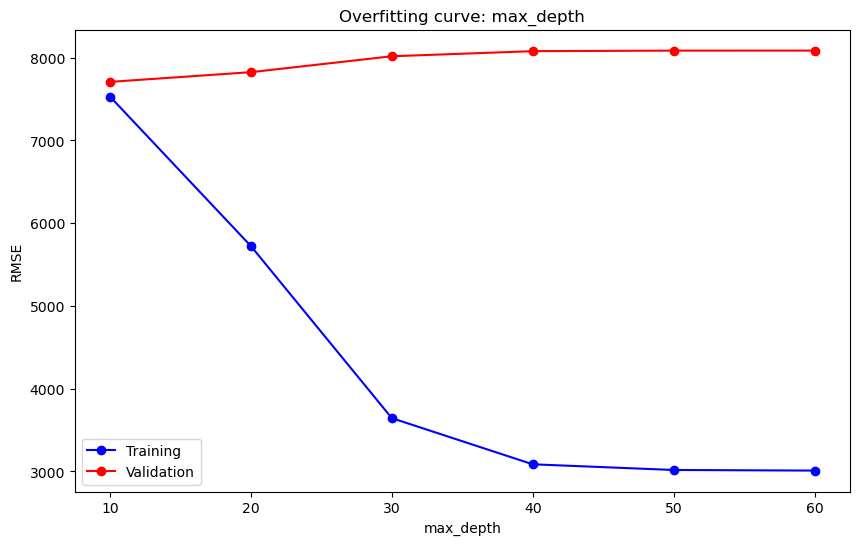

In [48]:
test_param_and_plot('max_depth', [10,20,30,40,50,60])

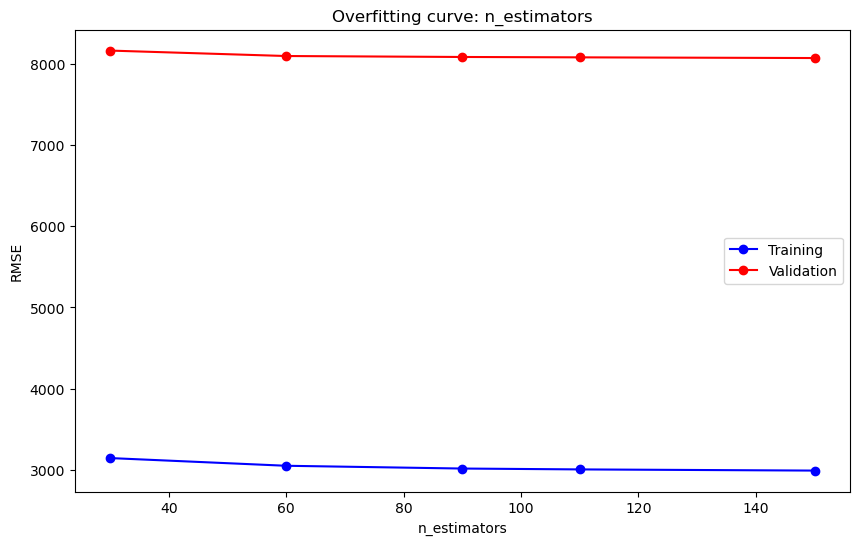

In [49]:
test_param_and_plot('n_estimators', [30,60,90,110,150])

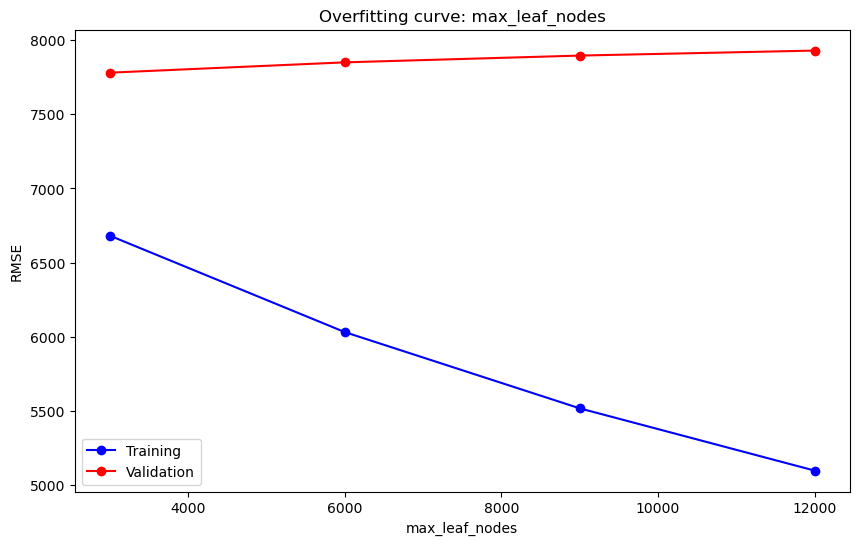

In [50]:
test_param_and_plot('max_leaf_nodes', [3000,6000,9000,12000])

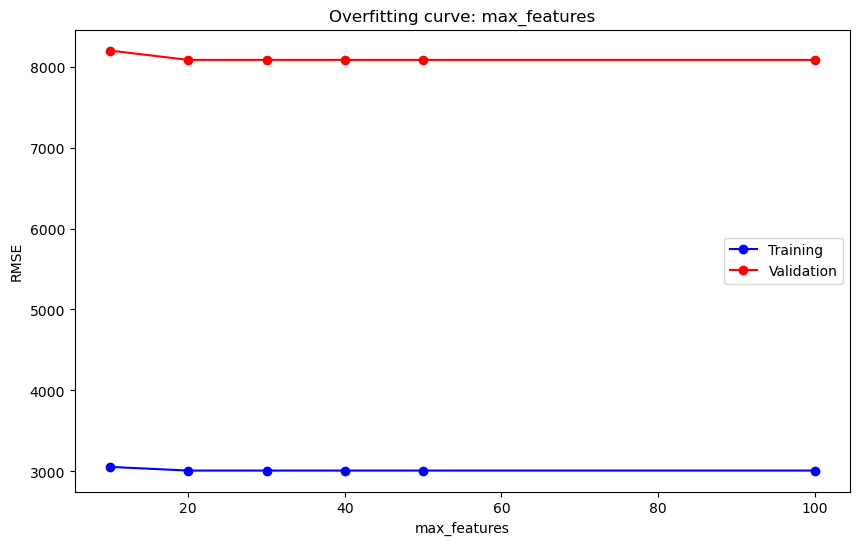

In [51]:
test_param_and_plot('max_features', [10,20,30,40,50,100])

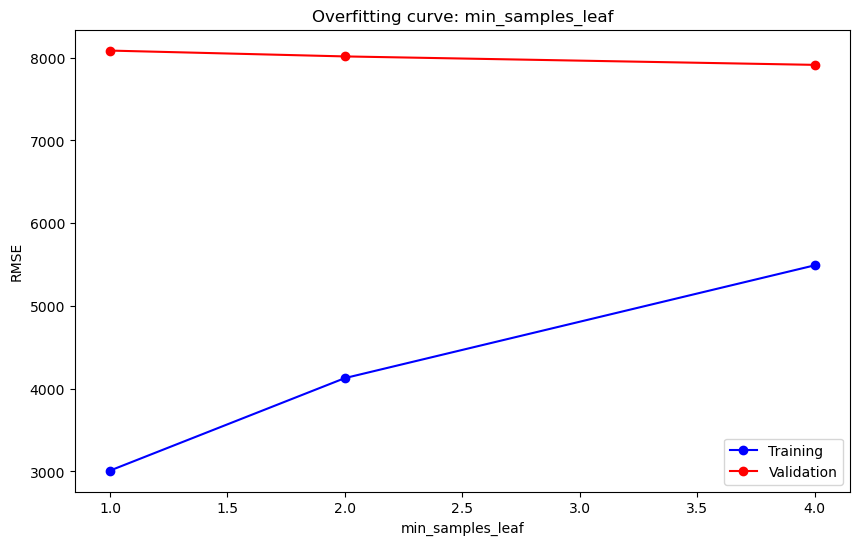

In [52]:
test_param_and_plot('min_samples_leaf', [1, 2, 4])

#### Trainning and Evaluating Random Forest Regressor

In [53]:
# Perform randomized search cross-validation with parallel computing
model = RandomForestRegressor(n_jobs = -1,  random_state=42, max_depth = 50, max_leaf_nodes= 7000, max_features=20, n_estimators=100,bootstrap= True)

In [54]:
model.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=50, max_features=20, max_leaf_nodes=7000,
                      n_jobs=-1, random_state=42)

In [55]:
# Make predictions on the training data
train_predictions = model.predict(train_inputs)
val_predictions = model.predict(val_inputs)
# Make predictions on the testing data
test_predictions = model.predict(test_inputs)

In [56]:
# Calculate R-squared for the training data
train_r2 = r2_score(train_targets, train_predictions)

# Calculate R-squared for the validation data
val_r2 = r2_score(val_targets, val_predictions)

# Calculate R-squared for the testing data
test_r2 = r2_score(test_targets, test_predictions)

In [57]:
# Calculate mean squared error (MSE) for the testing data
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))

In [58]:
# Print the R-squared and MSE
print("Training R-squared:", train_r2)
print("validation R-squared:", val_r2)
print("Testing R-squared:", test_r2)
# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Training R-squared: 0.5584326787400724
validation R-squared: 0.1991439677720238
Testing R-squared: 0.2136317475666657
Root Mean Squared Error (RMSE): 7759.644805084181


In [59]:
rf_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [60]:
rf_importance_df

,feature,importance
3,Fees,0.719624
4,Age,0.082733
1,Expected Year of Graduation,0.026653
0,Year of Admission,0.026547
15,Specialization_Web Development,0.013412
6,Field of Study_Chemical Engineering,0.013193
13,Specialization_Machine Learning,0.013138
8,Field of Study_Computer Science,0.013092
9,Field of Study_Electrical Engineering,0.012986
10,Field of Study_Mechanical Engineering,0.012909


#### Prediction

In [61]:
random_input = np.array([[2020, 2024, 3, 155152, 17, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

In [62]:
prediction = model.predict(random_input)

In [63]:
print("Predicted discount on fees:", prediction)

Predicted discount on fees: [16386.92271783]


### Second Model(Gradient Boosting)

#### Checking Overfitting and UnderFitting

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:

def test_params(**params):
    GBR = GradientBoostingRegressor(random_state=42,**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(GBR.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(GBR.predict(val_inputs), val_targets, squared=False)  # Calculate validation RMSE
    return train_rmse, val_rmse

def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

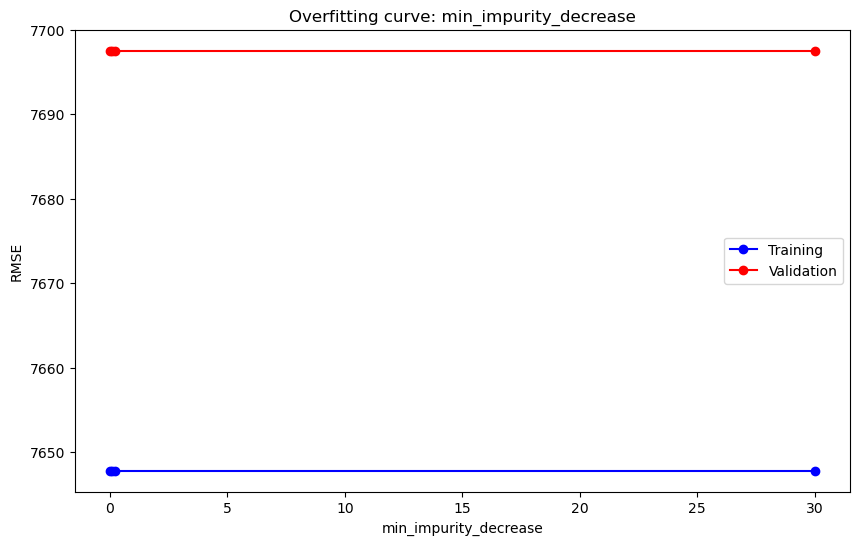

In [66]:
test_param_and_plot('min_impurity_decrease', [0.0, 0.1, 0.2, 30])


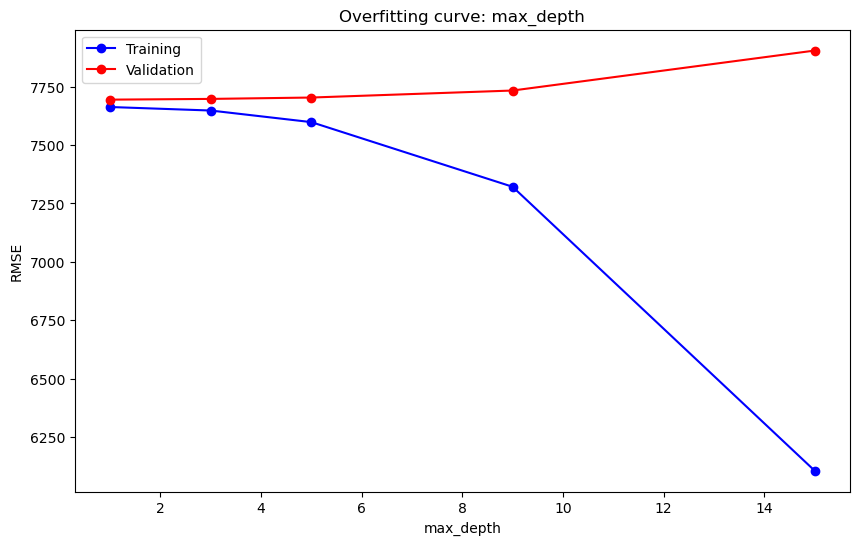

In [67]:
test_param_and_plot('max_depth', [1,3,5,9,15])


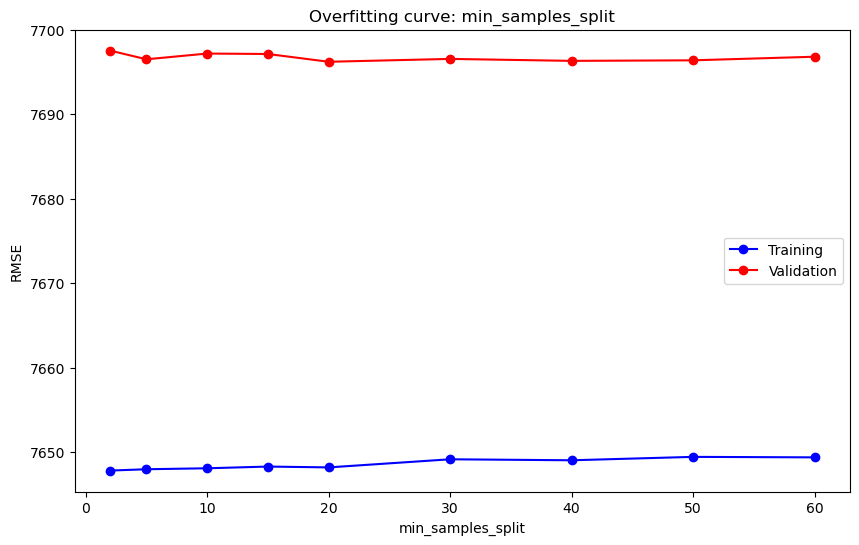

In [68]:
test_param_and_plot('min_samples_split', [2, 5, 10, 15,20,30,40,50,60])


#### Trainning and Evaluating Gradient Boosting Regressor

In [69]:
regressor = GradientBoostingRegressor(n_estimators=100, max_depth=5)

regressor.fit(train_inputs, train_targets)

GradientBoostingRegressor(max_depth=5)

In [70]:
# Make predictions on the training data
train_predictions = regressor.predict(train_inputs)
val_predictions = regressor.predict(val_inputs)
# Make predictions on the testing data
test_predictions = regressor.predict(test_inputs)

In [71]:
# Calculate R-squared for the training data
train_r2 = r2_score(train_targets, train_predictions)

# Calculate R-squared for the validation data
val_r2 = r2_score(val_targets, val_predictions)

# Calculate R-squared for the testing data
test_r2 = r2_score(test_targets, test_predictions)

In [72]:
# Calculate mean squared error (MSE) for the testing data
rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))

In [73]:
# Print the R-squared and MSE
print("Training R-squared:", train_r2)
print("validation R-squared:", val_r2)
print("Testing R-squared:", test_r2)
# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)

Training R-squared: 0.25426056641614403
validation R-squared: 0.23203494090536825
Testing R-squared: 0.2413762380144654
Root Mean Squared Error (RMSE): 7621.528484468944


In [74]:
GBR_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': regressor.feature_importances_
}).sort_values('importance', ascending=False)
GBR_importance_df

,feature,importance
3,Fees,0.982224
4,Age,0.004543
1,Expected Year of Graduation,0.001866
0,Year of Admission,0.001462
7,Field of Study_Civil Engineering,0.001287
13,Specialization_Machine Learning,0.001194
11,Specialization_Artificial Intelligence,0.001097
12,Specialization_Data Science,0.000878
2,Current Semester,0.000865
6,Field of Study_Chemical Engineering,0.000835


#### prediction

In [75]:
random_input2 = np.array([[2020, 2024, 3, 155152, 17, 0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

In [76]:
prediction2 = regressor.predict(random_input2)

In [77]:
print("Predicted discount on fees:", prediction2)

Predicted discount on fees: [15172.30374403]


## Saving the Model Weights

In [78]:
import joblib
# Save the Random Forest Regressor model weights to a file
joblib.dump(model, 'random_forest_model_weights.joblib')

# Save the Gradient Boosting Regressor model weights to a file
joblib.dump(regressor, 'gradient_boosting_model_weights.joblib')

['gradient_boosting_model_weights.joblib']

## References

https://www.kaggle.com/code/ahmadtalhaansari/insights-and-patterns-in-iit-data

https://www.kaggle.com/code/damerajee/iit-admission-eda

https://jovian.com/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization#C189